___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country the customer is from
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import os

# Set TF log level to ignore INFOs.
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [2]:
# Check python version
!python --version

Python 3.11.5


In [3]:
# Check tensorflow version
import tensorflow as tf

tf.__version__

'2.14.0'

In [4]:
# List cuda-capable gpu's that are attached to this session
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session")
else:
    print("CPU will be used for this session")

CPU will be used for this session


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [6]:
df=pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [10]:
# let's drop columns that are not useful

df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640,0
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770,0
9997,709,France,Female,36,7,0.000,1,0,1,42085.580,1
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1


In [11]:
# checking for missing values

df.isnull().sum().any()

# there are none

False

In [12]:
# There are two categorical feature of interest : geography and gender

df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

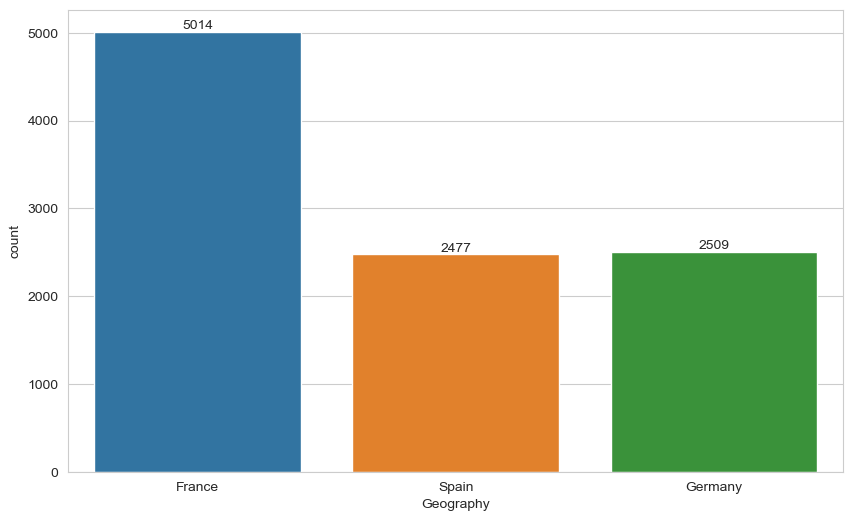

In [13]:
ax = sns.countplot(x=df["Geography"])
ax.bar_label(ax.containers[0]);

In [14]:
df.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

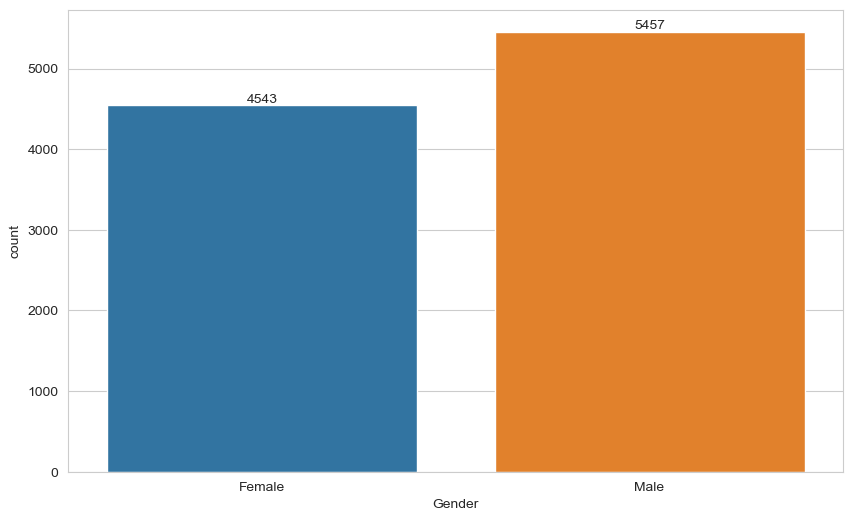

In [15]:
ax = sns.countplot(x=df["Gender"])
ax.bar_label(ax.containers[0]);

In [16]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

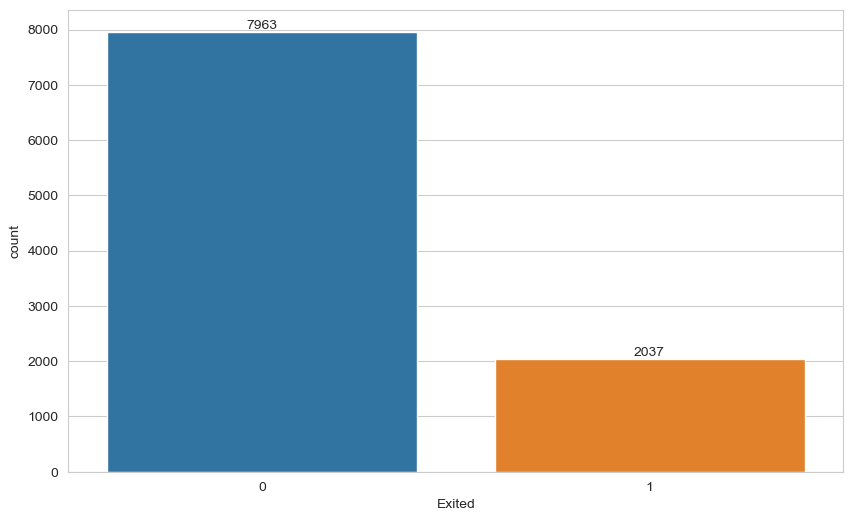

In [17]:
ax = sns.countplot(x=df["Exited"])
ax.bar_label(ax.containers[0]);

In [18]:
crosstab = pd.crosstab(df["Exited"], df["Gender"], normalize='columns')
print(crosstab)

# Females are more likely to churn than males

Gender  Female  Male
Exited              
0        0.749 0.835
1        0.251 0.165


In [19]:
crosstab = pd.crosstab(df["Exited"], df["Geography"], normalize='columns')
print(crosstab)

# Those from Germany are more likely to churn

Geography  France  Germany  Spain
Exited                           
0           0.838    0.676  0.833
1           0.162    0.324  0.167


In [20]:
# check distributions



In [21]:
# check histograms

In [22]:
# sns.pairplot(df, hue="Exited")
# plt.show()

In [23]:
df.corr(numeric_only=True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000,-0.004,0.001,0.006,0.012,-0.005,0.026,-0.001,-0.027
Age,-0.004,1.000,-0.010,0.028,-0.031,-0.012,0.085,-0.007,0.285
Tenure,0.001,-0.010,1.000,-0.012,0.013,0.023,-0.028,0.008,-0.014
Balance,0.006,0.028,-0.012,1.000,-0.304,-0.015,-0.010,0.013,0.119
NumOfProducts,0.012,-0.031,0.013,-0.304,1.000,0.003,0.010,0.014,-0.048
HasCrCard,-0.005,-0.012,0.023,-0.015,0.003,1.000,-0.012,-0.010,-0.007
IsActiveMember,0.026,0.085,-0.028,-0.010,0.010,-0.012,1.000,-0.011,-0.156
EstimatedSalary,-0.001,-0.007,0.008,0.013,0.014,-0.010,-0.011,1.000,0.012
Exited,-0.027,0.285,-0.014,0.119,-0.048,-0.007,-0.156,0.012,1.000


<Axes: >

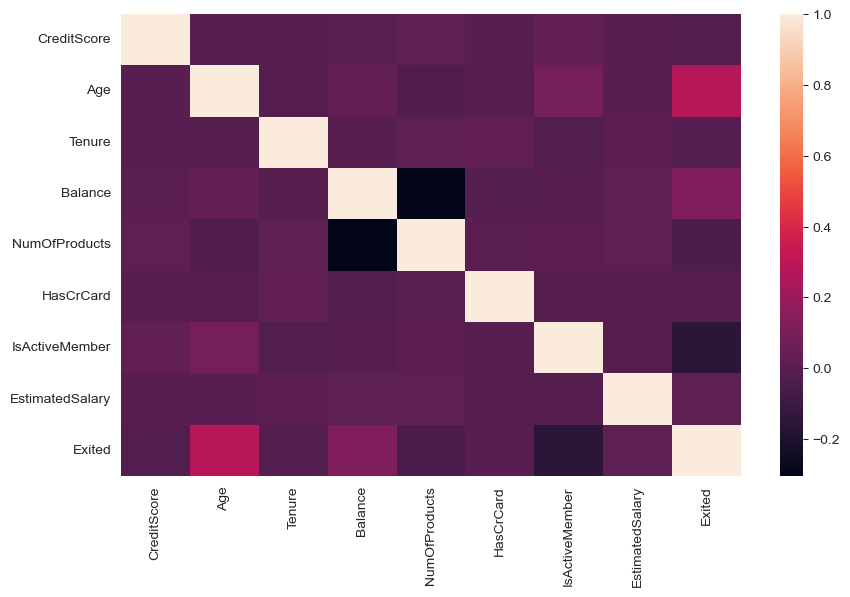

In [24]:
sns.heatmap(df.corr(numeric_only=True))

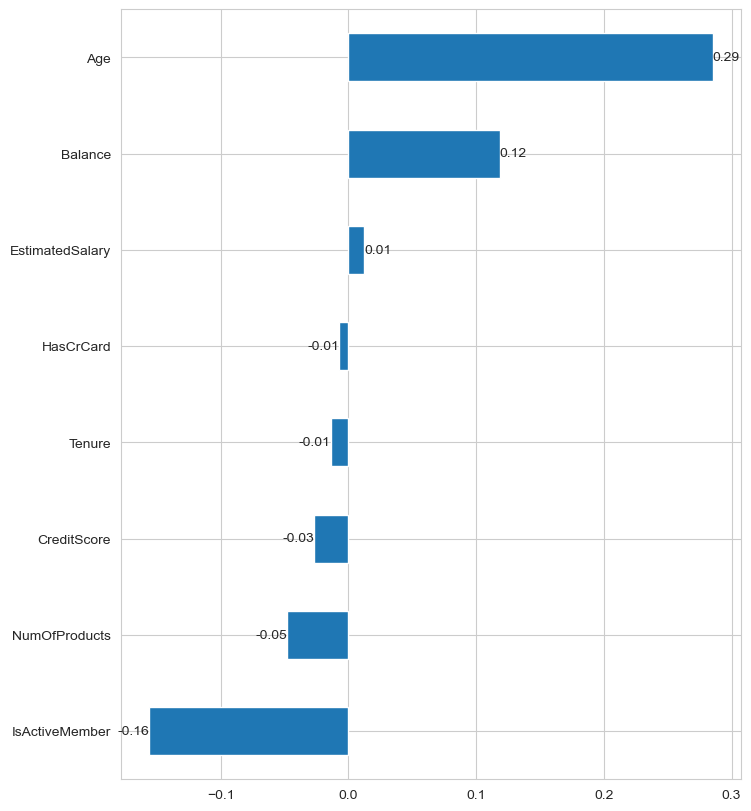

In [25]:
# correlation of features with the target feature

plt.figure(figsize=(8, 10))
ax=df.drop(["Geography", "Gender"], axis=1).corr()["Exited"].sort_values().drop("Exited").plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.show()

In [26]:
# Label encoding Gender
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Male'] = label_encoder.fit_transform(df['Gender'])
df


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1,0
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,0
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.000,2,1,0,96270.640,0,1
9996,516,France,Male,35,10,57369.610,1,1,1,101699.770,0,1
9997,709,France,Female,36,7,0.000,1,0,1,42085.580,1,0
9998,772,Germany,Male,42,3,75075.310,2,1,0,92888.520,1,1


In [27]:
# drop original Gender and move Male so that Exited (the target feature) is at index -1

df.drop("Gender", axis=1, inplace=True)
df = df[['Male', 'CreditScore', 'Geography', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited']]
df

,Male,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,619,France,42,2,0.000,1,1,1,101348.880,1
1,0,608,Spain,41,1,83807.860,1,0,1,112542.580,0
2,0,502,France,42,8,159660.800,3,1,0,113931.570,1
3,0,699,France,39,1,0.000,2,0,0,93826.630,0
4,0,850,Spain,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1,771,France,39,5,0.000,2,1,0,96270.640,0
9996,1,516,France,35,10,57369.610,1,1,1,101699.770,0
9997,0,709,France,36,7,0.000,1,0,1,42085.580,1
9998,1,772,Germany,42,3,75075.310,2,1,0,92888.520,1


In [28]:
 # Onehot encoding Geography

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, drop=None)
geography_encoded = encoder.fit_transform(df[['Geography']])
column_names = [f'{category}' for category in encoder.get_feature_names_out(['Geography'])]

geography_encoded_df = pd.DataFrame(geography_encoded, columns=column_names)

df = pd.concat([geography_encoded_df, df], axis=1)

df.drop("Geography", axis=1, inplace=True)

In [29]:
df

,Geography_France,Geography_Germany,Geography_Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1.000,0.000,0.000,0,619,42,2,0.000,1,1,1,101348.880,1
1,0.000,0.000,1.000,0,608,41,1,83807.860,1,0,1,112542.580,0
2,1.000,0.000,0.000,0,502,42,8,159660.800,3,1,0,113931.570,1
3,1.000,0.000,0.000,0,699,39,1,0.000,2,0,0,93826.630,0
4,0.000,0.000,1.000,0,850,43,2,125510.820,1,1,1,79084.100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.000,0.000,0.000,1,771,39,5,0.000,2,1,0,96270.640,0
9996,1.000,0.000,0.000,1,516,35,10,57369.610,1,1,1,101699.770,0
9997,1.000,0.000,0.000,0,709,36,7,0.000,1,0,1,42085.580,1
9998,0.000,1.000,0.000,1,772,42,3,75075.310,2,1,0,92888.520,1


# Preprocessing of Data
- Train | Test Split, Scalling

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df.drop('Exited', axis=1)
y = df["Exited"]

In [32]:
X

,Geography_France,Geography_Germany,Geography_Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1.000,0.000,0.000,0,619,42,2,0.000,1,1,1,101348.880
1,0.000,0.000,1.000,0,608,41,1,83807.860,1,0,1,112542.580
2,1.000,0.000,0.000,0,502,42,8,159660.800,3,1,0,113931.570
3,1.000,0.000,0.000,0,699,39,1,0.000,2,0,0,93826.630
4,0.000,0.000,1.000,0,850,43,2,125510.820,1,1,1,79084.100
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.000,0.000,0.000,1,771,39,5,0.000,2,1,0,96270.640
9996,1.000,0.000,0.000,1,516,35,10,57369.610,1,1,1,101699.770
9997,1.000,0.000,0.000,0,709,36,7,0.000,1,0,1,42085.580
9998,0.000,1.000,0.000,1,772,42,3,75075.310,2,1,0,92888.520


In [33]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y, random_state=42)

In [35]:
X_train.shape

(8000, 12)

In [36]:
X_test.shape

(2000, 12)

In [37]:
y_train.shape

(8000,)

In [38]:
y_test.shape

(2000,)

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [42]:
import tensorflow as tf

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate

In [44]:
X_train.shape

(8000, 12)

In [45]:
model = Sequential()

model.add(Dense(18, activation="relu", input_dim=X_train.shape[1])) # 12 * 1.5 =  18
model.add(Dense(9, activation="relu")) # 18/2
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [46]:
model.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=128, epochs=250, verbose=1
)
# tried epochs=1000 and result was an overfit

Epoch 1/250
57/57 [==============================] - 1s 3ms/step - loss: 0.5204 - accuracy: 0.7947 - val_loss: 0.4758 - val_accuracy: 0.8100
Epoch 2/250
57/57 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.7947 - val_loss: 0.4596 - val_accuracy: 0.8100
Epoch 3/250
57/57 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.7968 - val_loss: 0.4477 - val_accuracy: 0.8125
Epoch 4/250
57/57 [==============================] - 0s 1ms/step - loss: 0.4575 - accuracy: 0.8001 - val_loss: 0.4419 - val_accuracy: 0.8125
Epoch 5/250
57/57 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.8012 - val_loss: 0.4365 - val_accuracy: 0.8138
Epoch 6/250
57/57 [==============================] - 0s 1ms/step - loss: 0.4463 - accuracy: 0.8060 - val_loss: 0.4319 - val_accuracy: 0.8188
Epoch 7/250
57/57 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.8090 - val_loss: 0.4266 - val_accuracy: 0.8263
Epoch 8/250
5

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                234       
                                                                 
 dense_1 (Dense)             (None, 9)                 171       
                                                                 
 dense_2 (Dense)             (None, 4)                 40        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 450 (1.76 KB)
Trainable params: 450 (1.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [50]:
loss_df1= pd.DataFrame(model.history.history)
loss_df1.head()

,loss,accuracy,val_loss,val_accuracy
0,0.520,0.795,0.476,0.810
1,0.479,0.795,0.460,0.810
2,0.465,0.797,0.448,0.812
3,0.458,0.800,0.442,0.812
4,0.452,0.801,0.436,0.814


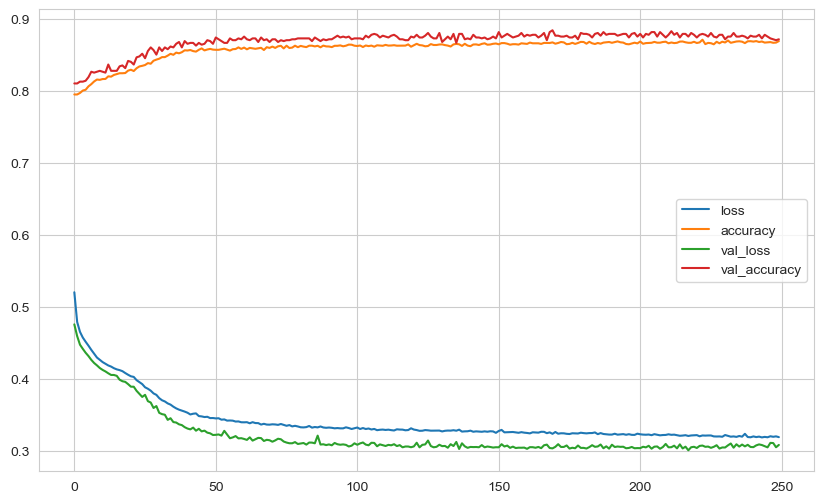

In [51]:
loss_df1.plot()
plt.show()

In [52]:
model.evaluate(X_test, y_test, verbose=0)

[0.3383805453777313, 0.8634999990463257]

In [53]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3383805453777313
accuracy:  0.8634999990463257


In [54]:
y_pred = model.predict(X_test) > 0.5 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1525   68]
 [ 205  202]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.75      0.50      0.60       407

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [53]:
# We don't seem to have an overfit.
# Precision and recall for those churned are off

#### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

63/63 [==============================] - 0s 956us/step


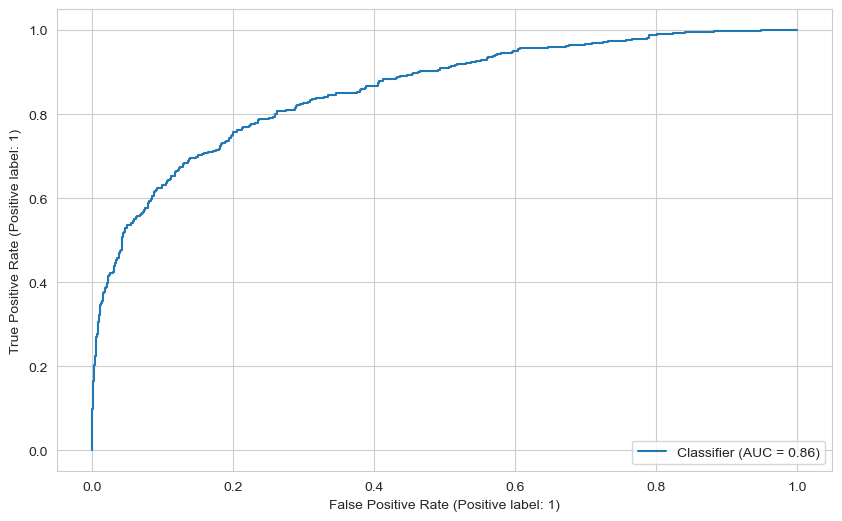

In [55]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [56]:
roc_auc_score(y_test, y_pred_proba)

0.8573750946632303

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [57]:
from keras.utils import to_categorical
from sklearn.utils import class_weight


# Compute class weights on the training data
# class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

classes = np.unique(y_train)
weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = {k: v for k, v in zip(classes, weights)}


In [58]:
class_weight_dict

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [59]:
model2 = Sequential()

model2.add(Dense(18, activation="relu", input_dim=X_train.shape[1])) # 12 * 1.5 rounded to 18
model2.add(Dense(9, activation="relu")) # 18/2=9
model2.add(Dense(4, activation="relu"))
model2.add(Dense(1, activation="sigmoid"))

model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"], sample_weight_mode = class_weight_dict)

In [60]:
model2.fit(
    x=X_train, y=y_train, validation_split=0.1, batch_size=128, epochs=250, verbose=1
)

Epoch 1/250
57/57 [==============================] - 1s 4ms/step - loss: 0.6873 - accuracy: 0.6868 - val_loss: 0.6678 - val_accuracy: 0.8100
Epoch 2/250
57/57 [==============================] - 0s 2ms/step - loss: 0.6301 - accuracy: 0.7947 - val_loss: 0.5573 - val_accuracy: 0.8100
Epoch 3/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.7947 - val_loss: 0.4785 - val_accuracy: 0.8100
Epoch 4/250
57/57 [==============================] - 0s 2ms/step - loss: 0.4932 - accuracy: 0.7947 - val_loss: 0.4715 - val_accuracy: 0.8100
Epoch 5/250
57/57 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.7947 - val_loss: 0.4654 - val_accuracy: 0.8100
Epoch 6/250
57/57 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7947 - val_loss: 0.4605 - val_accuracy: 0.8100
Epoch 7/250
57/57 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.7947 - val_loss: 0.4561 - val_accuracy: 0.8100
Epoch 8/250
5

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [61]:
loss_df2= pd.DataFrame(model2.history.history)
loss_df2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.687,0.687,0.668,0.810
1,0.630,0.795,0.557,0.810
2,0.518,0.795,0.479,0.810
3,0.493,0.795,0.471,0.810
4,0.486,0.795,0.465,0.810


<Axes: >

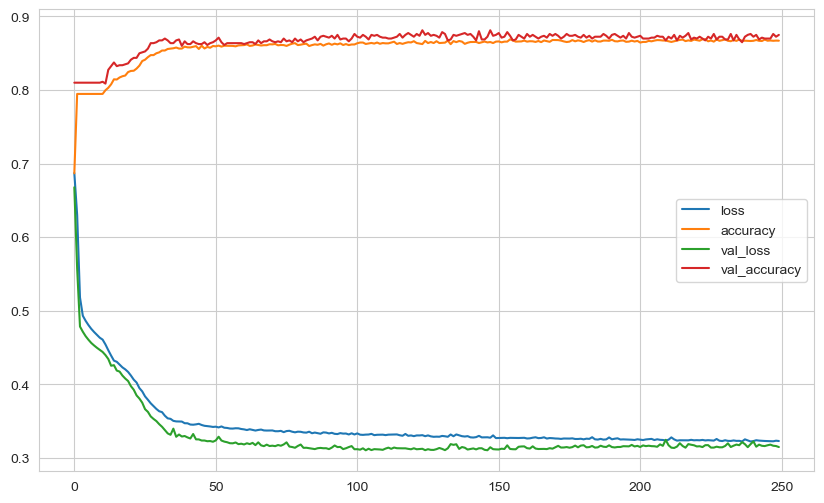

In [62]:
loss_d2 = pd.DataFrame(model2.history.history)
loss_d2.plot()

In [63]:
model2.evaluate(X_test, y_test, verbose=0)

[0.3322100341320038, 0.8650000095367432]

In [64]:
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3322100341320038
accuracy:  0.8650000095367432


In [65]:
y_pred = model2.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1532   61]
 [ 209  198]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.76      0.49      0.59       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.86      0.85      2000



#### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

63/63 [==============================] - 0s 1ms/step


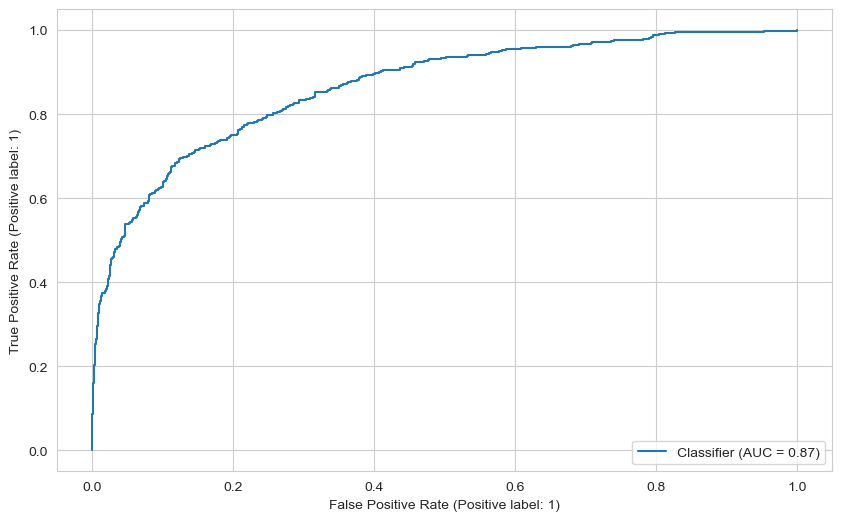

In [66]:
y_pred_proba = model2.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [67]:
roc_auc_score(y_test, y_pred_proba)

0.8655589333555435

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [68]:
from tensorflow.keras.optimizers import Adam

In [69]:
model3 = Sequential()

model3.add(Dense(18, activation="relu", input_dim=X_train.shape[1])) # 12 * 1.5=18
model3.add(Dense(9, activation="relu"))
model3.add(Dense(4, activation="relu"))
model3.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.003)
model3.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"], sample_weight_mode = class_weight_dict)


In [70]:
model3.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=250,
    verbose=1,
)

Epoch 1/250
57/57 [==============================] - 1s 4ms/step - loss: 0.6395 - accuracy: 0.7567 - val_loss: 0.5109 - val_accuracy: 0.8100
Epoch 2/250
57/57 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.7947 - val_loss: 0.4524 - val_accuracy: 0.8100
Epoch 3/250
57/57 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.7947 - val_loss: 0.4417 - val_accuracy: 0.8100
Epoch 4/250
57/57 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.7947 - val_loss: 0.4343 - val_accuracy: 0.8100
Epoch 5/250
57/57 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.7947 - val_loss: 0.4236 - val_accuracy: 0.8100
Epoch 6/250
57/57 [==============================] - 0s 2ms/step - loss: 0.4268 - accuracy: 0.8049 - val_loss: 0.4032 - val_accuracy: 0.8375
Epoch 7/250
57/57 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8243 - val_loss: 0.3841 - val_accuracy: 0.8537
Epoch 8/250
5

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [71]:
loss_df3= pd.DataFrame(model3.history.history)
loss_df3.head()

,loss,accuracy,val_loss,val_accuracy
0,0.639,0.757,0.511,0.810
1,0.487,0.795,0.452,0.810
2,0.461,0.795,0.442,0.810
3,0.450,0.795,0.434,0.810
4,0.442,0.795,0.424,0.810


<Axes: >

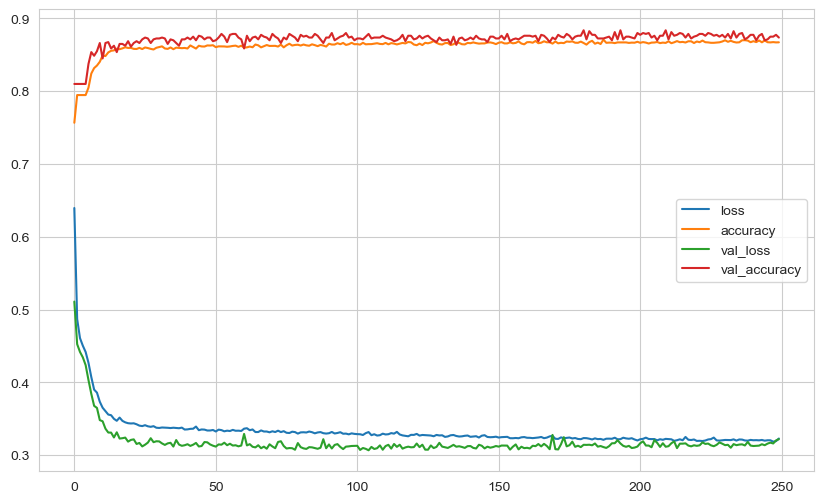

In [72]:
loss_df = pd.DataFrame(model3.history.history)
loss_df.plot()

In [73]:
model3.evaluate(X_test, y_test, verbose=0)

[0.34961754083633423, 0.8654999732971191]

In [74]:
loss, accuracy = model3.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.34961754083633423
accuracy:  0.8654999732971191


In [75]:
y_pred = model3.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1499   94]
 [ 175  232]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1593
           1       0.71      0.57      0.63       407

    accuracy                           0.87      2000
   macro avg       0.80      0.76      0.78      2000
weighted avg       0.86      0.87      0.86      2000



63/63 [==============================] - 0s 949us/step


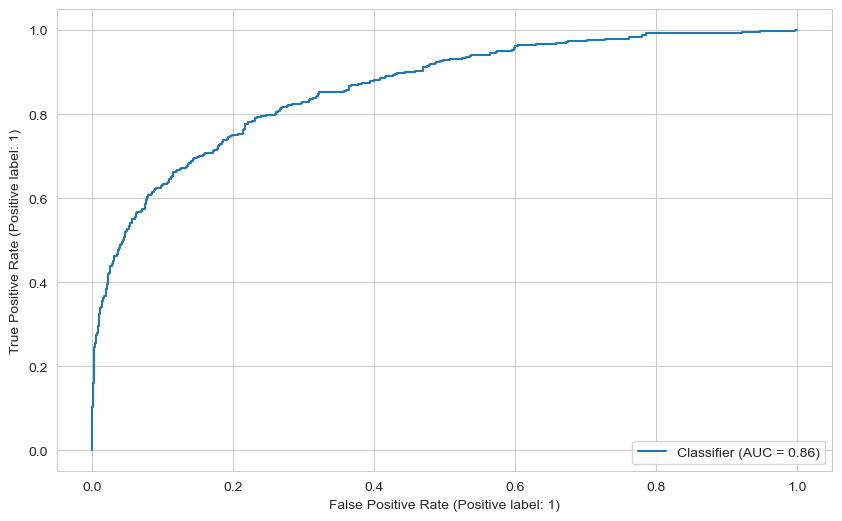

In [79]:
y_pred_proba = model2.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [80]:
roc_auc_score(y_test, y_pred_proba)

0.8623615911751505

#### ROC (Receiver Operating Curve) and AUC (Area Under Curve)

63/63 [==============================] - 0s 1ms/step


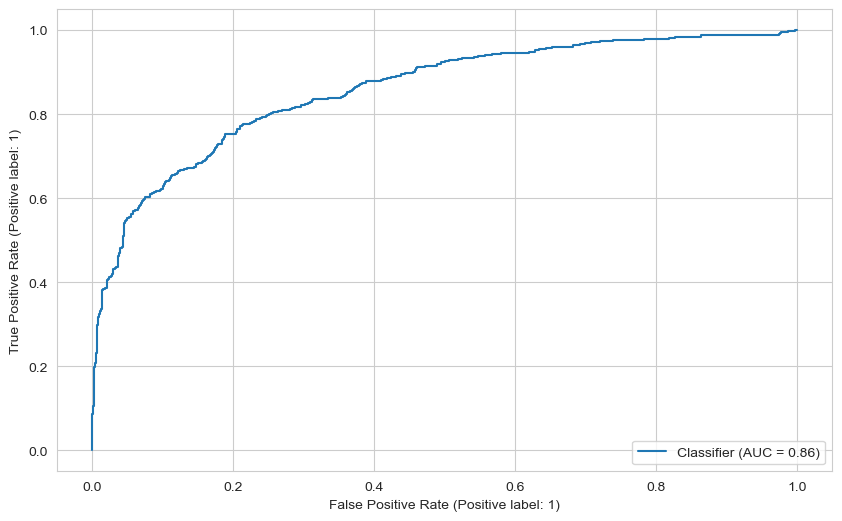

In [76]:
y_pred_proba = model3.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [77]:
roc_auc_score(y_test, y_pred_proba)

0.8572717555768403

### Add Dropout Layer

In [78]:
from tensorflow.keras.layers import Dropout

In [79]:
model4 = Sequential()

model4.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
model4.add(Dropout(0.5))

model4.add(Dense(9, activation="relu"))
model4.add(Dropout(0.5))

model4.add(Dense(4, activation="relu"))
model4.add(Dropout(0.5))

model4.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.003)
model4.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"], sample_weight_mode = class_weight_dict)


In [80]:
model4.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=250,
    verbose=1,
)

Epoch 1/250
57/57 [==============================] - 1s 5ms/step - loss: 0.6874 - accuracy: 0.6957 - val_loss: 0.5502 - val_accuracy: 0.8100
Epoch 2/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5900 - accuracy: 0.7885 - val_loss: 0.5313 - val_accuracy: 0.8100
Epoch 3/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5599 - accuracy: 0.7925 - val_loss: 0.5104 - val_accuracy: 0.8100
Epoch 4/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.7937 - val_loss: 0.5009 - val_accuracy: 0.8100
Epoch 5/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5333 - accuracy: 0.7946 - val_loss: 0.4944 - val_accuracy: 0.8100
Epoch 6/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.7949 - val_loss: 0.4903 - val_accuracy: 0.8100
Epoch 7/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.7951 - val_loss: 0.4790 - val_accuracy: 0.8100
Epoch 8/250
5

In [82]:
loss_df4= pd.DataFrame(model4.history.history)
loss_df4.head()

,loss,accuracy,val_loss,val_accuracy
0,0.687,0.696,0.550,0.810
1,0.590,0.788,0.531,0.810
2,0.560,0.793,0.510,0.810
3,0.546,0.794,0.501,0.810
4,0.533,0.795,0.494,0.810


<Axes: >

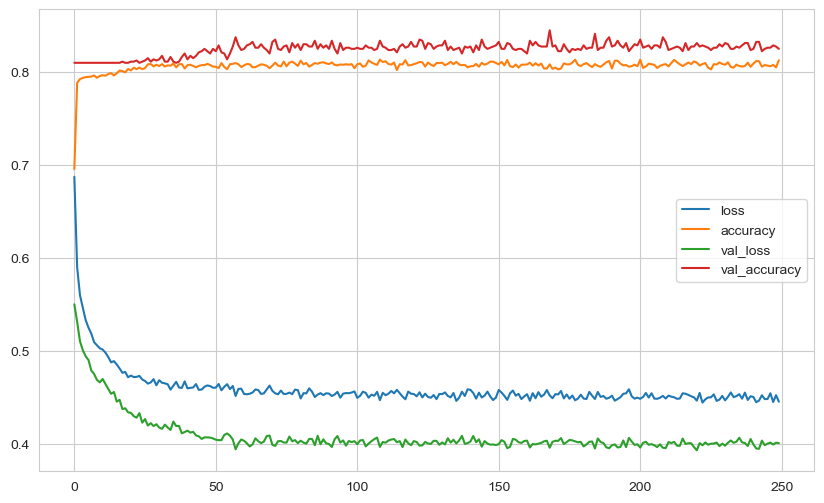

In [83]:
loss_df4 = pd.DataFrame(model4.history.history)
loss_df4.plot()

In [84]:
loss, accuracy = model4.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4127601087093353
accuracy:  0.8159999847412109


In [85]:
y_pred = model4.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1589    4]
 [ 364   43]]
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1593
           1       0.91      0.11      0.19       407

    accuracy                           0.82      2000
   macro avg       0.86      0.55      0.54      2000
weighted avg       0.83      0.82      0.75      2000



63/63 [==============================] - 0s 949us/step


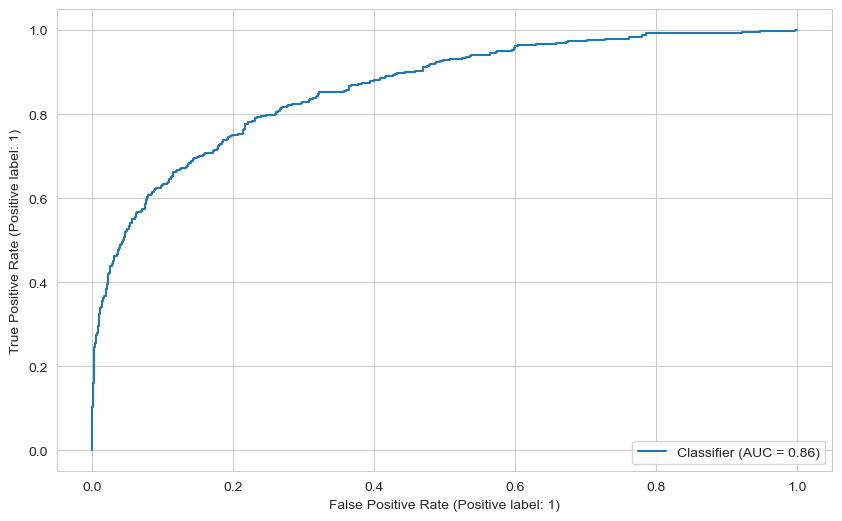

In [79]:
y_pred_proba = model2.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [80]:
roc_auc_score(y_test, y_pred_proba)

0.8623615911751505

### Add Early Stop

#### Monitor the "val_loss" as metric

In [92]:
model5 = Sequential()

model5.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
model5.add(Dropout(0.5))

model5.add(Dense(9, activation="relu"))
model5.add(Dropout(0.5))

model5.add(Dense(4, activation="relu"))
model5.add(Dropout(0.5))

model5.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.003)
model5.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"], sample_weight_mode = class_weight_dict)


In [93]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

# here I enter val_loss as the monitor parameter

In [94]:
model5.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=250,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/250
57/57 [==============================] - 1s 9ms/step - loss: 0.6042 - accuracy: 0.7947 - val_loss: 0.5224 - val_accuracy: 0.8100
Epoch 2/250
57/57 [==============================] - 0s 3ms/step - loss: 0.5473 - accuracy: 0.7947 - val_loss: 0.4890 - val_accuracy: 0.8100
Epoch 3/250
57/57 [==============================] - 0s 3ms/step - loss: 0.5203 - accuracy: 0.7947 - val_loss: 0.4738 - val_accuracy: 0.8100
Epoch 4/250
57/57 [==============================] - 0s 3ms/step - loss: 0.5203 - accuracy: 0.7947 - val_loss: 0.4728 - val_accuracy: 0.8100
Epoch 5/250
57/57 [==============================] - 0s 4ms/step - loss: 0.5088 - accuracy: 0.7947 - val_loss: 0.4669 - val_accuracy: 0.8100
Epoch 6/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5060 - accuracy: 0.7947 - val_loss: 0.4658 - val_accuracy: 0.8100
Epoch 7/250
57/57 [==============================] - 0s 4ms/step - loss: 0.5031 - accuracy: 0.7947 - val_loss: 0.4606 - val_accuracy: 0.8100
Epoch 8/250
5

In [95]:
loss_df5= pd.DataFrame(model5.history.history)
loss_df5.head()

,loss,accuracy,val_loss,val_accuracy
0,0.604,0.795,0.522,0.810
1,0.547,0.795,0.489,0.810
2,0.520,0.795,0.474,0.810
3,0.520,0.795,0.473,0.810
4,0.509,0.795,0.467,0.810


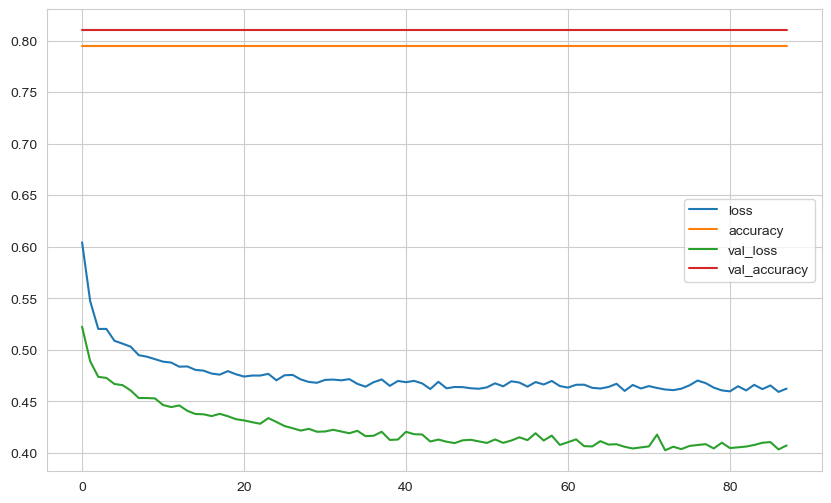

In [96]:
loss_df5 = pd.DataFrame(model5.history.history)
loss_df5.plot()
plt.show()

In [97]:
loss, accuracy = model5.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.4203006625175476
accuracy:  0.796500027179718


In [98]:
y_pred = model5.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 987us/step
[[1593    0]
 [ 407    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



#### Monitor the "val_recall" as metric

In [101]:
model6 = Sequential()

model6.add(Dense(18, activation="relu", input_dim=X_train.shape[1]))
model6.add(Dropout(0.5))

model6.add(Dense(9, activation="relu"))
model6.add(Dropout(0.5))

model6.add(Dense(4, activation="relu"))
model6.add(Dropout(0.5))

model6.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.003)
model6.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"], sample_weight_mode = class_weight_dict)


In [102]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor="val_recall", mode="min", verbose=1, patience=15, restore_best_weights=True
)

# here I enter val_recall as the monitor parameter

In [103]:
model6.fit(
    x=X_train,
    y=y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=250,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/250
57/57 [==============================] - 1s 4ms/step - loss: 0.5917 - accuracy: 0.7947 - val_loss: 0.5012 - val_accuracy: 0.8100
Epoch 2/250
57/57 [==============================] - 0s 3ms/step - loss: 0.5491 - accuracy: 0.7947 - val_loss: 0.4875 - val_accuracy: 0.8100
Epoch 3/250
57/57 [==============================] - 0s 3ms/step - loss: 0.5281 - accuracy: 0.7947 - val_loss: 0.4769 - val_accuracy: 0.8100
Epoch 4/250
57/57 [==============================] - 0s 3ms/step - loss: 0.5172 - accuracy: 0.7947 - val_loss: 0.4675 - val_accuracy: 0.8100
Epoch 5/250
57/57 [==============================] - 0s 3ms/step - loss: 0.5166 - accuracy: 0.7947 - val_loss: 0.4696 - val_accuracy: 0.8100
Epoch 6/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.7947 - val_loss: 0.4623 - val_accuracy: 0.8100
Epoch 7/250
57/57 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7947 - val_loss: 0.4597 - val_accuracy: 0.8100
Epoch 8/250
5

In [ ]:
# Tensorflow throws the warning that val_recall is not an available metric

In [104]:
loss_df6= pd.DataFrame(model6.history.history)
loss_df6.head()

,loss,accuracy,val_loss,val_accuracy
0,0.592,0.795,0.501,0.810
1,0.549,0.795,0.487,0.810
2,0.528,0.795,0.477,0.810
3,0.517,0.795,0.467,0.810
4,0.517,0.795,0.470,0.810


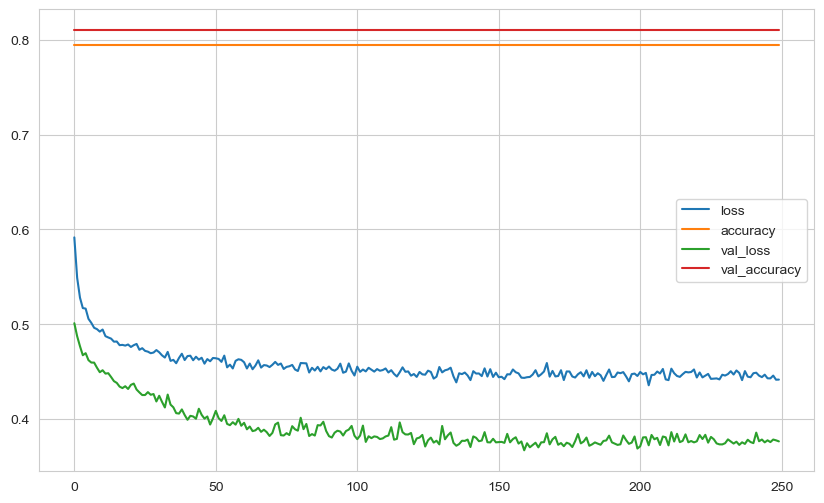

In [106]:
loss_df6 = pd.DataFrame(model6.history.history)
loss_df6.plot()
plt.show()

In [107]:
loss, accuracy = model6.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3951955735683441
accuracy:  0.796500027179718


In [108]:
y_pred = model6.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 967us/step
[[1593    0]
 [ 407    0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1593
           1       0.00      0.00      0.00       407

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.63      0.80      0.71      2000



## Optuna

In [128]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna

In [129]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [130]:
trial_metric = "accuracy"
batch_size = 128


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=1000,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_test, y_test, verbose=0)[1]
    return score

In [132]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)
study.best_params

[I 2023-11-12 17:02:42,999] A new study created in memory with name: no-name-0db66231-8ef2-4e6c-b90e-e7efc04a950c


Restoring model weights from the end of the best epoch: 10.
Epoch 25: early stopping


[I 2023-11-12 17:02:48,166] Trial 0 finished with value: 0.6984999775886536 and parameters: {'n_units1': 100, 'n_units2': 114, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.014792407756486782, 'w0': 0.09456216746011332, 'w1': 0.8115224926192448}. Best is trial 0 with value: 0.6984999775886536.


Restoring model weights from the end of the best epoch: 912.
Epoch 927: early stopping


[I 2023-11-12 17:05:30,820] Trial 1 finished with value: 0.7975000143051147 and parameters: {'n_units1': 99, 'n_units2': 45, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00771873864992675, 'w0': 0.19336835399917232, 'w1': 0.38447322628048936}. Best is trial 1 with value: 0.7975000143051147.


Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-11-12 17:05:35,551] Trial 2 finished with value: 0.796500027179718 and parameters: {'n_units1': 67, 'n_units2': 37, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 9.366233188204641e-05, 'w0': 1.569826324634099, 'w1': 0.0439467389236764}. Best is trial 1 with value: 0.7975000143051147.


Restoring model weights from the end of the best epoch: 11.
Epoch 26: early stopping


[I 2023-11-12 17:05:40,657] Trial 3 finished with value: 0.43799999356269836 and parameters: {'n_units1': 85, 'n_units2': 117, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.004633262553852099, 'w0': 0.012540100147461973, 'w1': 0.5111348796371691}. Best is trial 1 with value: 0.7975000143051147.


Restoring model weights from the end of the best epoch: 31.
Epoch 46: early stopping


[I 2023-11-12 17:05:50,022] Trial 4 finished with value: 0.796500027179718 and parameters: {'n_units1': 17, 'n_units2': 123, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 1.088427073813527e-05, 'w0': 1.9324739333551928, 'w1': 0.13656079496001614}. Best is trial 1 with value: 0.7975000143051147.


Restoring model weights from the end of the best epoch: 74.
Epoch 89: early stopping


[I 2023-11-12 17:06:07,793] Trial 5 finished with value: 0.8709999918937683 and parameters: {'n_units1': 73, 'n_units2': 98, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0005768645381348347, 'w0': 0.10602295310240863, 'w1': 0.08267670239266077}. Best is trial 5 with value: 0.8709999918937683.


Restoring model weights from the end of the best epoch: 118.
Epoch 133: early stopping


[I 2023-11-12 17:06:33,181] Trial 6 finished with value: 0.796500027179718 and parameters: {'n_units1': 40, 'n_units2': 117, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0007326028090510848, 'w0': 1.9413472599957682, 'w1': 0.05292160551026323}. Best is trial 5 with value: 0.8709999918937683.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-11-12 17:06:37,721] Trial 7 finished with value: 0.7944999933242798 and parameters: {'n_units1': 95, 'n_units2': 96, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0011452426496302594, 'w0': 0.02742440104842283, 'w1': 0.11561968069210085}. Best is trial 5 with value: 0.8709999918937683.


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-11-12 17:06:41,973] Trial 8 finished with value: 0.3889999985694885 and parameters: {'n_units1': 94, 'n_units2': 124, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 1.819895451259734e-05, 'w0': 0.7076174404193296, 'w1': 3.8351614872295623}. Best is trial 5 with value: 0.8709999918937683.


Restoring model weights from the end of the best epoch: 7.
Epoch 22: early stopping


[I 2023-11-12 17:06:48,223] Trial 9 finished with value: 0.796500027179718 and parameters: {'n_units1': 35, 'n_units2': 116, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 2.778334717210889e-05, 'w0': 0.3160584073517432, 'w1': 0.017741792945556122}. Best is trial 5 with value: 0.8709999918937683.


{'n_units1': 73,
 'n_units2': 98,
 'optimizer': keras.src.optimizers.adam.Adam,
 'learning_rate': 0.0005768645381348347,
 'w0': 0.10602295310240863,
 'w1': 0.08267670239266077}

In [133]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)

model = Sequential()
model.add(Dense(unit1, activation="relu"))
model.add(Dense(unit2, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    batch_size=128,
    epochs=1000,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/1000
57/57 [==============================] - 1s 5ms/step - loss: 0.5515 - recall: 0.0413 - val_loss: 0.4680 - val_recall: 0.0000e+00
Epoch 2/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4763 - recall: 0.0000e+00 - val_loss: 0.4511 - val_recall: 0.0000e+00
Epoch 3/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.4610 - recall: 0.0277 - val_loss: 0.4419 - val_recall: 0.0197
Epoch 4/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.4488 - recall: 0.0927 - val_loss: 0.4316 - val_recall: 0.0921
Epoch 5/1000
57/57 [==============================] - 0s 4ms/step - loss: 0.4382 - recall: 0.1326 - val_loss: 0.4228 - val_recall: 0.1579
Epoch 6/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.4288 - recall: 0.1773 - val_loss: 0.4172 - val_recall: 0.2039
Epoch 7/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4219 - recall: 0.2273 - val_loss: 0.4092 - val_recall: 0.2171
Epoch 8/1000
57/57 [==

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [134]:
history = model.history.history

<Axes: >

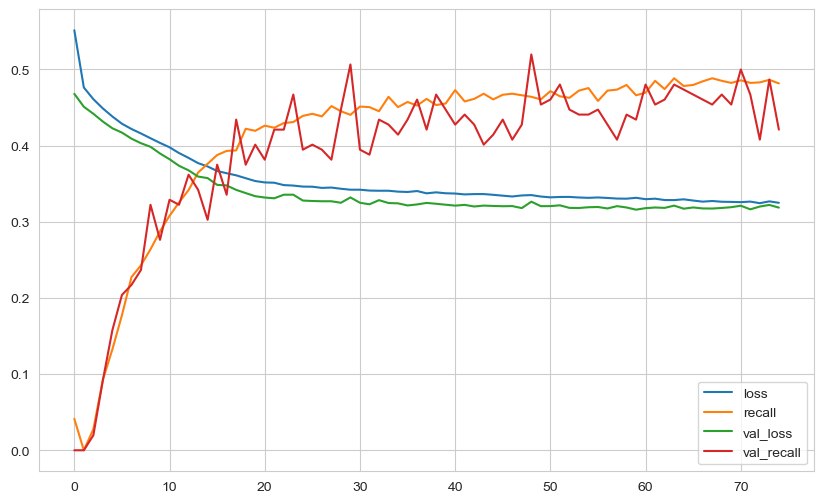

In [135]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [136]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.34564632177352905
accuracy:  0.44717445969581604


In [137]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 2ms/step
[[1538   55]
 [ 225  182]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



63/63 [==============================] - 0s 821us/step


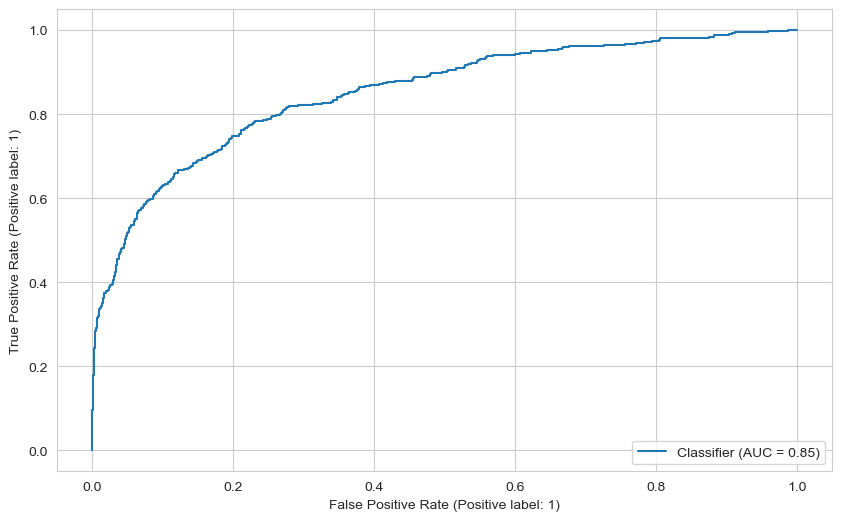

In [138]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [139]:
roc_auc_score(y_test, y_pred_proba)

0.8515896481998178

# Final Model and Model Deployment

In [140]:
import pickle
pickle.dump(scaler, open("scaler_churn", "wb"))

In [141]:
model.save("model_churn.h5")

## Loading Model and Scaler

In [142]:
from tensorflow.keras.models import load_model

In [143]:
model_churn = load_model("model_churn.h5")
scaler_churn = pickle.load(open("scaler_churn", "rb"))

## Prediction

In [144]:
single_customer = df.drop("Exited", axis=1).iloc[25:26, :]
single_customer

,Geography_France,Geography_Germany,Geography_Spain,Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
25,1.000,0.000,0.000,1,577,25,3,0.000,2,0,1,124508.290


In [145]:
single_customer = scaler_churn.transform(single_customer)
single_customer

array([[1.        , 0.        , 0.        , 1.        , 0.454     ,
        0.09459459, 0.3       , 0.        , 0.33333333, 0.        ,
        1.        , 0.622543  ]])

In [146]:
(model_churn.predict(single_customer) > 0.5).astype("int32")

1/1 [==============================] - 0s 63ms/step


array([[0]])

In [147]:
model_churn.predict(single_customer)

1/1 [==============================] - 0s 26ms/step


array([[0.00659618]], dtype=float32)

In [148]:
df["Exited"].iloc[26]

0

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___